<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN Solutions

_Authors: _

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoid overfitting that is commonly referred to as the _train/test split_. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Fix a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

Try a variety of response variables. Start with **MEDV** / `.target` attribute from the data set load method.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

### 1. Clean Up Any Data
Load the Boston housing data. Fix any problems, if applicable.

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always EDA.

In [3]:
# Always EDA.

def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
#     print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
#     for item in dataframe:
#         print item
#         print dataframe[item].nunique()

eda(X)

missing values 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64
dataframe types 
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object
dataframe describe 
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000  

## Using `scikit-learn` Linear Regression

### 2. Select 3–4 variables from your data set on which to perform a 50/50 test-train split.
Score and plot your predictions.

In [4]:
from sklearn.model_selection import train_test_split # Import train-test split from model selection
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, random_state =8 ) # Split the data in half (train_size = .05)
# We're also setting a random_state in this case. 
# This is a great [Stack Overflow](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) explanation of what random state does. 

In [5]:
from sklearn.linear_model import LinearRegression # We then import LinearRegression
lr = LinearRegression() # and instantiate the algorithm 

In [6]:
model = lr.fit(X_train,y_train) # We then fit the model  
predictions = lr.predict(X_test) # and make predictions based on the X_test
lr.score(X_test, y_test) # Then check the score (Check: what's the default scoring metric for linear regression) 

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.71068895272802424

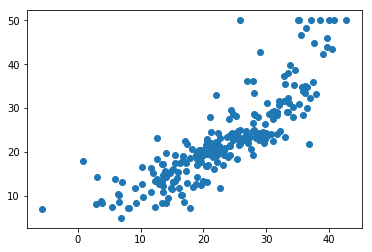

In [7]:
plt.scatter(predictions, y_test)

### 3. Try 70/30 and 90/10
Score and plot. How do your metrics change?

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 8) # All we've changed in this case is the train size

model = lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

lr.score(X_test, y_test)

0.70799341124725923

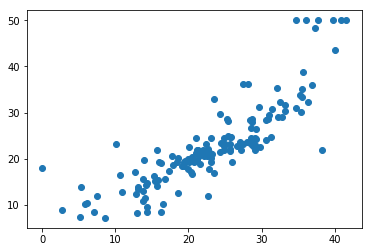

In [9]:
plt.scatter(predictions, y_test)
# There are fewer points being plotted because our test set was smaller

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, random_state = 8)

model = lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

lr.score(X_test, y_test)
# Note that we are getting worse scores the smaller the size of our test 
# Why is that?

0.6807978762848339

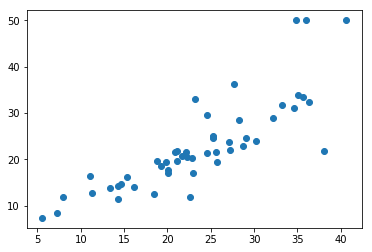

In [11]:
plt.scatter(predictions, y_test)

### 4. Try K-Fold Between 5-10 for Your Regression
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score.

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

for folds in range(5,11): # Here we're just declaring how many k-folds we want our model to loop through
    lr = LinearRegression() # Scikit-learn has made it so cross_val is even more intuitive and fits the model AND cross-validates it in the same step
    scores = cross_val_score(lr, X, y, cv=folds) # For every new number of folds, we are pulling out the scores 
    # For every time (k) we cross-validate the model (which is also being fit in that same step)
    print str(folds)+" Cross-validated scores:", scores # we're then asking it to print scores for every single time it does this
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds) # and its predictions
    accuracy = metrics.r2_score(y, predictions) # We're then looking at the r2 of the predicted values vs. our actual values. 
    print str(folds)+" Cross-Predicted Accuracy:", accuracy # and printing that out
    # Extra space for printing
    print 

5 Cross-validated scores: [ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
5 Cross-Predicted Accuracy: 0.559652434646

6 Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]
6 Cross-Predicted Accuracy: 0.537671767736

7 Cross-validated scores: [ 0.65289125  0.59571869  0.67862548  0.61141877  0.51888956 -0.27835015
  0.39774739]
7 Cross-Predicted Accuracy: 0.564584520386

8 Cross-validated scores: [ 0.75014285  0.42039086  0.71854702  0.57190316  0.75650376 -0.37306354
 -0.35181135  0.33556184]
8 Cross-Predicted Accuracy: 0.620582930393

9 Cross-validated scores: [ 0.7414133   0.4777157   0.5777252   0.58038448  0.64917642  0.70816441
 -0.14095944 -0.5491727   0.37669769]
9 Cross-Predicted Accuracy: 0.593840427406

10 Cross-validated scores: [ 0.73334917  0.47229799 -1.01097697  0.64126348  0.54709821  0.73610181
  0.37761817 -0.13026905 -0.78372253  0.41861839]
10 Cross-Predicted Accuracy: 0.590177393332



In [13]:
# We can also do this on a subset of our data!!!
for folds in range(5,11): # Here we're just declaring how many k-folds we want our model to loop thorugh
    lr = LinearRegression() 
    scores = cross_val_score(lr, X_train, y_train, cv=folds) # In this case, we're fitting our training data and getting our initial cross_val_scores
    print str(folds)+" Cross-validated scores:", scores 
    predictions = cross_val_predict(model, X_test, y_test, cv=folds) # and getting cross_val predictions based on the test data
    accuracy = metrics.r2_score(y_test, predictions) # We're then looking at the r2 of the predicted values vs. our actual values
    print str(folds)+" Cross-Predicted Accuracy:", accuracy # and printing that out
    # Extra space for printing
    print 

5 Cross-validated scores: [ 0.7310341   0.71116734  0.79748423  0.65151326  0.59540812]
5 Cross-Predicted Accuracy: 0.406642297378

6 Cross-validated scores: [ 0.75695637  0.7336252   0.72949534  0.71607209  0.68669686  0.61731407]
6 Cross-Predicted Accuracy: 0.42247751742

7 Cross-validated scores: [ 0.73649078  0.70546698  0.75888779  0.76175865  0.72145572  0.66341562
  0.55010929]
7 Cross-Predicted Accuracy: 0.441734839927

8 Cross-validated scores: [ 0.69384559  0.72240216  0.82415326  0.6791991   0.78425579  0.58855513
  0.81466226  0.37976952]
8 Cross-Predicted Accuracy: 0.44279141739

9 Cross-validated scores: [ 0.75207266  0.69742075  0.7623421   0.7072293   0.78026808  0.66992467
  0.65066413  0.79927666  0.36591094]
9 Cross-Predicted Accuracy: 0.465948636484

10 Cross-validated scores: [ 0.75790965  0.69501916  0.70239548  0.73203965  0.76150378  0.83577713
  0.6444816   0.65302231  0.72555546  0.38274054]
10 Cross-Predicted Accuracy: 0.480357662838



### Interpretation

# KNN Practice

In [14]:
# Read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [15]:
iris.head()

# Allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [16]:
# Create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

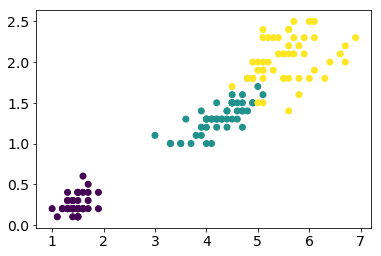

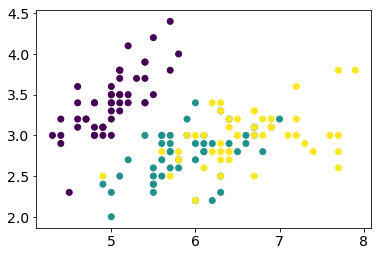

In [17]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = [0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2 for x in iris.species]

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
plt.scatter(iris.petal_length, iris.petal_width, c=iris.species_num)
plt.show() # This just ensures that my plots will show up

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(iris.sepal_length, iris.sepal_width, c=iris.species_num)



## KNN Modeling


### Store Feature Matrix in "X"
This will be all species measurements.

In [18]:
# My features are going to be everything except what my species is


X = iris[['sepal_width','sepal_length','petal_width','petal_length']]
X.head()

,sepal_width,sepal_length,petal_width,petal_length
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


### Store Response Vector in "y"
This will be the species type.


In [19]:
# My y is going to be the species (because that's what I'm predicting)
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make Use of Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split # Importing this from model_evaluation instead of cross_val
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33) # and creating a train and test set using TTS

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor


In [21]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # Set my neighboour to be 1
knn.fit(X_train, y_train) # Fit my train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy


In [22]:
knn.score(X_test, y_test) # What seems wrong here?

0.97999999999999998

### Create a Model With Five Neighbors. Did it Improve?


In [23]:
knn5 = KNeighborsClassifier(n_neighbors = 5) # Hey! That got better!
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.97999999999999998

### Create a Looped Function That Will Check All Levels of Various Neighbors and Implement it

4 1.0


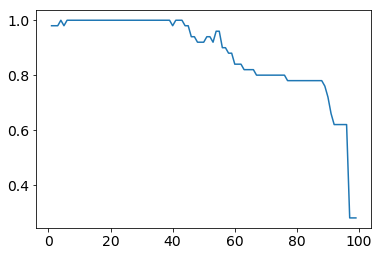

In [24]:
k_scores = {} # Create an empty dictionary
best_score = 0 
best_k = 0 
for i in range(1,len(X_train)): # Loop through integers from 1 through however many obvervations there are in the training data
    knn = KNeighborsClassifier(n_neighbors = i) # For every single integer, set neighbors to be that number of integers
    knn.fit(X_train, y_train) # and then fit a model to the training data
    score = knn.score(X_test, y_test) # and save the score for each fit
    k_scores[i] = score # Add this to the empty dictionary with the number of neighbors: score
    if score > best_score: # If the current score is better than whatever is currently the best score
        best_score = score # save the current score as best_score
        best_k = i # and the current number of neighbors as best_k
print best_k, best_score # and then print out what exactly are the best_k and best_score

plt.plot(k_scores.keys(), k_scores.values()) # Plot it, too!

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?


## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.


In [25]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf


# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 19 Jul 2017   Prob (F-statistic):          1.59e-321
Time:                        02:56:46   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.0

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

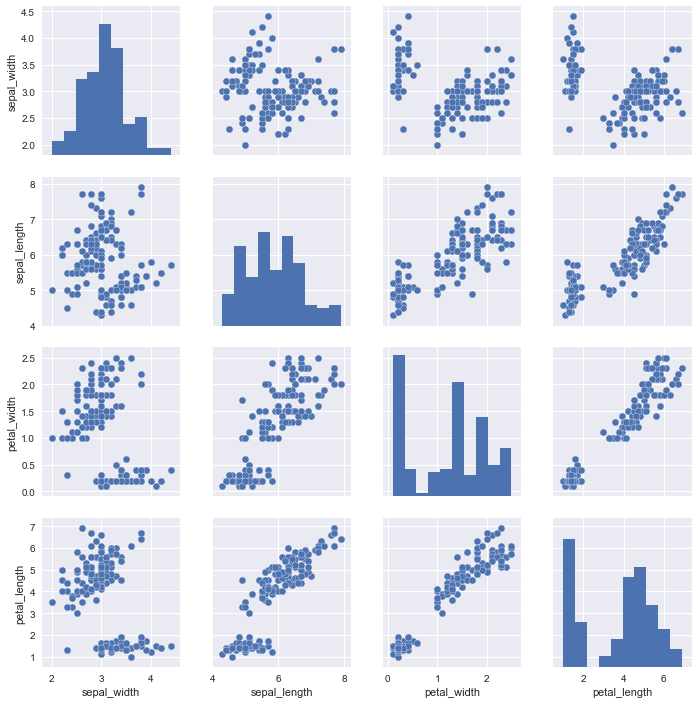

In [27]:
# Check out variable relations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(X)

In [28]:
# Check out Pearson scores


### Demo: Patsy

In [29]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [30]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [31]:
# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print "R^2 Score: ", metrics.r2_score(y_test, predictions)

NameError: name 'linear_model' is not defined